<a href="https://colab.research.google.com/github/NesanK96/Machine-Learning/blob/main/2.%20Linear%20Regression%20-%20Car%20Price%20Prediction%20-%20Assignment8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment8

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model

# How Much is Your Car Worth?

Data about the retail price of 2005 General Motors cars can be found in `car_data.csv`.

The columns are:

1. Price: suggested retail price of the used 2005 GM car in excellent condition.
2. Mileage: number of miles the car has been driven
3. Make: manufacturer of the car such as Saturn, Pontiac, and Chevrolet
4. Model: specific models for each car manufacturer such as Ion, Vibe, Cavalier
5. Trim (of car): specific type of car model such as SE Sedan 4D, Quad Coupe 2D          
6. Type: body type such as sedan, coupe, etc.      
7. Cylinder: number of cylinders in the engine        
8. Liter: a more specific measure of engine size     
9. Doors: number of doors           
10. Cruise: indicator variable representing whether the car has cruise control (1 = cruise)
11. Sound: indicator variable representing whether the car has upgraded speakers (1 = upgraded)
12. Leather: indicator variable representing whether the car has leather seats (1 = leather)






In [4]:
df = pd.read_csv("car_data.csv")

In [5]:
df

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1
1,17542.036083,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
2,16218.847862,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
3,16336.913140,16342,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,0
4,16339.170324,19832,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
799,16507.070267,16229,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,1,0,0
800,16175.957604,19095,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,1,1,0
801,15731.132897,20484,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,1,1,0
802,15118.893228,25979,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,1,1,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 804 entries, 0 to 803
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Price     804 non-null    float64
 1   Mileage   804 non-null    int64  
 2   Make      804 non-null    object 
 3   Model     804 non-null    object 
 4   Trim      804 non-null    object 
 5   Type      804 non-null    object 
 6   Cylinder  804 non-null    int64  
 7   Liter     804 non-null    float64
 8   Doors     804 non-null    int64  
 9   Cruise    804 non-null    int64  
 10  Sound     804 non-null    int64  
 11  Leather   804 non-null    int64  
dtypes: float64(2), int64(6), object(4)
memory usage: 75.5+ KB


In [7]:
df['Make'].unique()
# df['Make'].value_counts()

array(['Buick', 'Cadillac', 'Chevrolet', 'Pontiac', 'SAAB', 'Saturn'],
      dtype=object)

In [8]:
df['Model'].unique()

array(['Century', 'Lacrosse', 'Lesabre', 'Park Avenue', 'CST-V', 'CTS',
       'Deville', 'STS-V6', 'STS-V8', 'XLR-V8', 'AVEO', 'Cavalier',
       'Classic', 'Cobalt', 'Corvette', 'Impala', 'Malibu', 'Monte Carlo',
       'Bonneville', 'G6', 'Grand Am', 'Grand Prix', 'GTO', 'Sunfire',
       'Vibe', '9_3', '9_3 HO', '9_5', '9_5 HO', '9-2X AWD', 'Ion',
       'L Series'], dtype=object)

In [9]:
df['Trim'].unique()

array(['Sedan 4D', 'CX Sedan 4D', 'CXL Sedan 4D', 'CXS Sedan 4D',
       'Custom Sedan 4D', 'Limited Sedan 4D', 'Special Ed Ultra 4D',
       'DHS Sedan 4D', 'DTS Sedan 4D', 'Hardtop Conv 2D',
       'LS Hatchback 4D', 'LS Sedan 4D', 'LT Hatchback 4D', 'LT Sedan 4D',
       'SVM Hatchback 4D', 'SVM Sedan 4D', 'Coupe 2D', 'LS Coupe 2D',
       'LS Sport Coupe 2D', 'LS Sport Sedan 4D', 'Conv 2D', 'SS Sedan 4D',
       'LS MAXX Hback 4D', 'LT MAXX Hback 4D', 'MAXX Hback 4D',
       'LT Coupe 2D', 'SS Coupe 2D', 'GXP Sedan 4D', 'SE Sedan 4D',
       'SLE Sedan 4D', 'GT Sedan 4D', 'GT Coupe 2D', 'GTP Sedan 4D',
       'AWD Sportwagon 4D', 'GT Sportwagon', 'Sportwagon 4D',
       'Linear Conv 2D', 'Linear Sedan 4D', 'Aero Conv 2D',
       'Aero Sedan 4D', 'Arc Conv 2D', 'Arc Sedan 4D', 'Arc Wagon 4D',
       'Linear Wagon 4D', 'Aero Wagon 4D', 'Quad Coupe 2D',
       'L300 Sedan 4D'], dtype=object)

In [10]:
df['Type'].value_counts()

Sedan          490
Coupe          140
Wagon           64
Hatchback       60
Convertible     50
Name: Type, dtype: int64

## Tasks, Part 1

1. Find the linear regression equation for mileage vs price.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)


### **EDA and Outlier Detection**

In [11]:
df['Mileage'].describe()

count      804.000000
mean     19831.934080
std       8196.319707
min        266.000000
25%      14623.500000
50%      20913.500000
75%      25213.000000
max      50387.000000
Name: Mileage, dtype: float64

In [12]:
Q3, Q1 = (np.percentile(df['Mileage'], [75,25])).round(2)

IQR_Mileage = Q3 - Q1

UL = Q3 + (1.5 * IQR_Mileage) # Upper Limit
LL = Q1 - (1.5 * IQR_Mileage) # Lower Limit

print(df['Mileage'].shape)

df.drop(df[df['Mileage']>UL].index, inplace = True)
df.drop(df[df['Mileage']<LL].index, inplace = True)
df['Mileage'].shape

(804,)


(799,)

In [13]:
df.shape

(799, 12)

- **Correlation - to check Linearity in the data, Linear Relationship**

In [14]:
X = df['Mileage'].values # Mileage - Feature
y = df['Price'].values   # Price (of the Vehicle) - Target

Text(0.5, 1.0, 'Mileage vs Price')

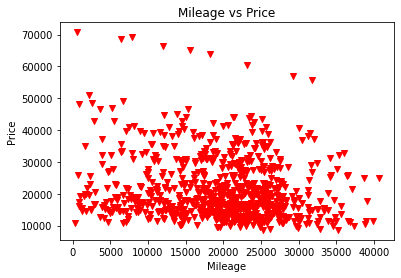

In [15]:
plt.scatter(X, y, color = 'red', marker = 'v')
plt.xlabel('Mileage')
plt.ylabel('Price')
plt.title('Mileage vs Price')

In [16]:
df[['Mileage', 'Price']].corr()

,Mileage,Price
Mileage,1.000000,-0.165933
Price,-0.165933,1.000000


**Correlation is less between Mileage and Price. There is no linear relationship. So, transformation is required.**

,Transformed,Price
Transformed,1.000000,-0.155548
Price,-0.155548,1.000000


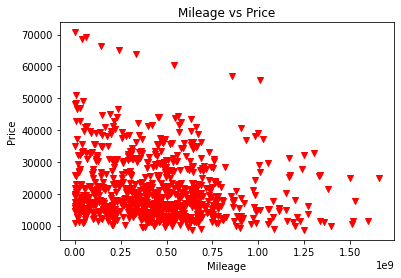

In [17]:
df['Transformed'] = np.square(df['Mileage'])        # correlation = - 0.15 is too less
# df['Transformed'] = np.power(df['Mileage'], 3)      # correlation = - 0.14 is too less
# df['Transformed'] = np.power(df['Mileage'], 0.25)   # correlation = - 0.16, also too less
# df['Transformed'] = np.log(df['Mileage'])           # r = - 0.15
# df['Transformed'] = np.exp(df['Mileage'])           # r = 0

plt.scatter(df['Transformed'], y, color = 'red', marker = 'v')
plt.xlabel('Mileage')
plt.ylabel('Price')
plt.title('Mileage vs Price')

df[['Transformed', 'Price']].corr()

**Even after, trandformation, there is no linear relationship. So, here we use the 'Original Feature' for modeling.**

**Linear Regression for Mileage vs Price**

In [18]:
X = df['Mileage'].values # Mileage - Feature
y = df['Price'].values   # Price (of the Vehicle) - Target

In [19]:
# train test split

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [20]:
X_train = X_train.reshape(-1,1)
y_train = y_train.reshape(-1,1)
X_test = X_test.reshape(-1,1)
y_test = y_test.reshape(-1,1)

In [21]:
# from sklearn.preprocessing import StandardScaler ## standrard scalig 
# scaler = StandardScaler() #initialise to a variable

# scaler.fit(X_train,y_train) 

# X_train = scaler.transform(X_train) 
# X_test = scaler.transform(X_test)

In [22]:
from sklearn.linear_model import LinearRegression

model = LinearRegression(normalize = True)

model.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  FutureWarning,


LinearRegression(normalize=True)

In [23]:
m = (model.coef_[0][0]).round(2)

c = (model.intercept_[0]).round(2)

m,c

(-0.2, 25206.72)

1. **Find the linear regression equation for this data**

- y = mx + c

- **Price = (m * Mileage) + c**

In [24]:
print('Linear Regression equation, y = {} * x + ({})'.format(m,c))

Linear Regression equation, y = -0.2 * x + (25206.72)


2. **Chart the original data and the equation on the chart.**

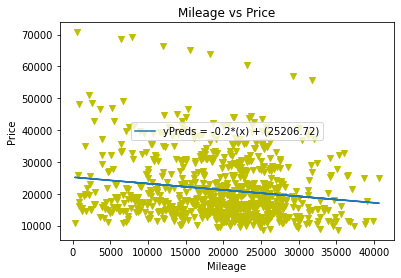

In [25]:
plt.scatter(X, y, color = 'y', marker = 'v')
plt.plot(X, model.predict(X.reshape(-1,1)), label = 'yPreds = {}*(x) + ({})'.format(m,c))
plt.xlabel('Mileage')
plt.ylabel('Price')
plt.title('Mileage vs Price')
plt.legend(loc = 'center')
plt.show()

 3. **Evaluation Metric:**

In [26]:
y_pred = model.predict(X_test.reshape(-1,1))

In [27]:
from sklearn import metrics 
print('R2- SCORE:', metrics.r2_score(y_test,y_pred).round(4))

R2- SCORE: 0.0374


**Since, R2-Score falls below 0.5, the equation is considered to be not fit for prediction.**

In [28]:
# method 2
model.score(X_test, y_test).round(4)

0.0374

## Tasks, Part 2

1. Use mileage, cylinders, liters, doors, cruise, sound, and leather to find the linear regression equation.
2. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)
3. Find the combination of the factors that is the best predictor for price.

- **Mileage vs Price**

**From the above findings, we can see there is no linearity between Mileage and Price. So, we can drop the feature.**

- **Cylinder vs Price**

In [29]:
df['Cylinder'].value_counts()

4    392
6    309
8     98
Name: Cylinder, dtype: int64

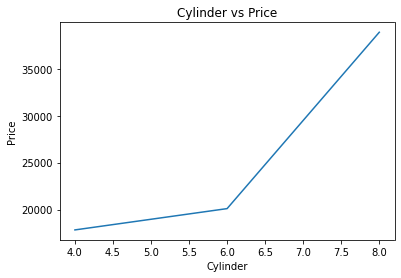

In [30]:
df.groupby('Cylinder')['Price'].mean().plot()
plt.xlabel('Cylinder')
plt.ylabel('Price')
plt.title('Cylinder vs Price')
plt.show()

In [31]:
df[['Cylinder', 'Price']].corr()

,Cylinder,Price
Cylinder,1.000000,0.567626
Price,0.567626,1.000000




---


**There is linearity in the data between Number of Engine Cylinders and Price. No, transformation required.**



---


***As the number of Cylinder increases, the price gets increases.***



---



- **Liter (measure of Engine Size) vs Price**

In [32]:
df['Liter'].unique()

array([3.1, 3.6, 3.8, 5.7, 2.8, 4.6, 1.6, 2.2, 6. , 3.5, 3.4, 1.8, 2. ,
       2.3, 2.5, 3. ])

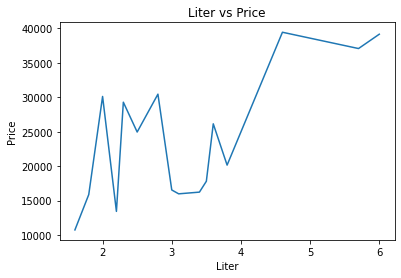

In [33]:
df.groupby('Liter')['Price'].mean().plot()
plt.xlabel('Liter')
plt.ylabel('Price')
plt.title('Liter vs Price')
plt.show()

In [34]:
df[['Liter', 'Price']].corr()

,Liter,Price
Liter,1.000000,0.558134
Price,0.558134,1.000000




---


**There is linearity in the data between Number of Engine Cylinders and Price. No, transformation required.**


---



- **Number of Doors in Car vs Price**

In [35]:
df['Doors'].unique()

array([4, 2])

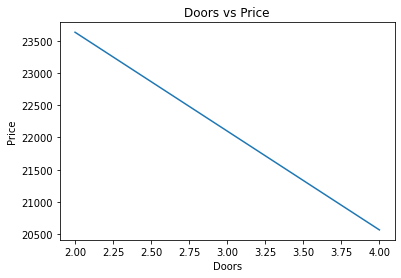

In [36]:
df.groupby('Doors')['Price'].mean().plot()
plt.xlabel('Doors')
plt.ylabel('Price')
plt.title('Doors vs Price')
plt.show()

In [37]:
df[['Doors', 'Price']].corr()

,Doors,Price
Doors,1.000000,-0.132153
Price,-0.132153,1.000000


,Transformed,Price
Transformed,1.000000,-0.132153
Price,-0.132153,1.000000


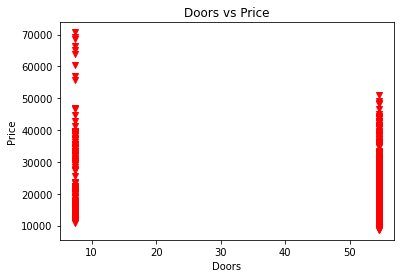

In [38]:
# df['Transformed'] = np.square(df['Doors'])
# df['Transformed'] = np.power(df['Doors'], 3) 
# df['Transformed'] = np.power(df['Doors'], 0.25) 
# df['Transformed'] = np.log(df['Doors'])           
df['Transformed'] = np.exp(df['Doors'])           

plt.scatter(df['Transformed'], y, color = 'red', marker = 'v')
plt.xlabel('Doors')
plt.ylabel('Price')
plt.title('Doors vs Price')

df[['Transformed', 'Price']].corr()

- **Cruise vs Price**

In [39]:
df['Cruise'].value_counts()

1    600
0    199
Name: Cruise, dtype: int64

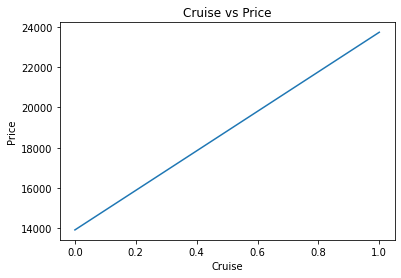

In [40]:
df.groupby('Cruise')['Price'].mean().plot()
plt.xlabel('Cruise')
plt.ylabel('Price')
plt.title('Cruise vs Price')
plt.show()

In [41]:
df[['Cruise', 'Price']].corr()

,Cruise,Price
Cruise,1.000000,0.431234
Price,0.431234,1.000000




---


**There is linearity in the data between Number of Engine Cylinders and Price. No, transformation required.**


---

**Cars with Cruise Control System, are priced higher.**


---



- **Sound vs Price**

In [42]:
df['Sound'].value_counts()

1    542
0    257
Name: Sound, dtype: int64

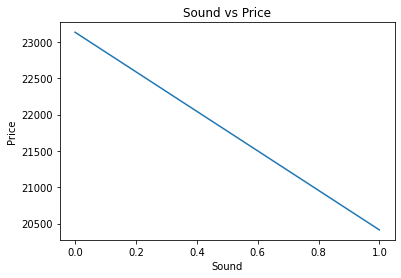

In [43]:
df.groupby('Sound')['Price'].mean().plot()
plt.xlabel('Sound')
plt.ylabel('Price')
plt.title('Sound vs Price')
plt.show()

In [44]:
df[['Sound', 'Price']].corr()

,Sound,Price
Sound,1.000000,-0.129252
Price,-0.129252,1.000000


,Transformed,Price
Transformed,1.000000,-0.129252
Price,-0.129252,1.000000


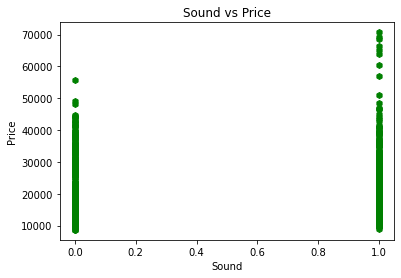

In [45]:
# df['Transformed'] = np.square(df['Sound'])
# df['Transformed'] = np.power(df['Sound'], 3) 
df['Transformed'] = np.power(df['Sound'], 0.25) 
# df['Transformed'] = np.log(df['Sound'])           
# df['Transformed'] = np.exp(df['Sound'])           

plt.scatter(df['Transformed'], y, color = 'green', marker = 'h')
plt.xlabel('Sound')
plt.ylabel('Price')
plt.title('Sound vs Price')

df[['Transformed', 'Price']].corr()



---


**There is no linearity in the data even after transformation. So, we can drop this feature.**


---



**Leather vs Price**

In [46]:
df['Leather'].unique()

array([1, 0])

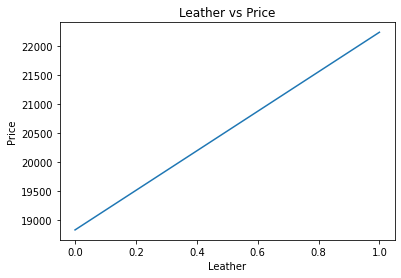

In [47]:
df.groupby('Leather')['Price'].mean().plot()
plt.xlabel('Leather')
plt.ylabel('Price')
plt.title('Leather vs Price')
plt.show()

In [48]:
df[['Leather', 'Price']].corr()

,Leather,Price
Leather,1.000000,0.155033
Price,0.155033,1.000000


,Transformed,Price
Transformed,1.000000,0.155033
Price,0.155033,1.000000


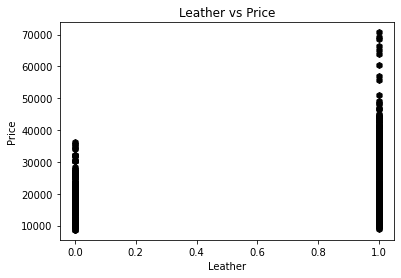

In [49]:
# df['Transformed'] = np.square(df['Leather'])
df['Transformed'] = np.power(df['Leather'], 3) 
# df['Transformed'] = np.power(df['Leather'], 0.25) 
# df['Transformed'] = np.log(df['Leather'])           
# df['Transformed'] = np.exp(df['Leather'])           

plt.scatter(df['Transformed'], y, color = 'black', marker = 'h')
plt.xlabel('Leather')
plt.ylabel('Price')
plt.title('Leather vs Price')

df[['Transformed', 'Price']].corr()

---


**There is no linearity in the data even after transformation. So, we can drop this feature.**


---

**Linear Regression (using all the features)**

In [50]:
X = df[['Mileage', 'Liter', 'Cylinder', 'Doors', 'Cruise', 'Sound', 'Leather']].values #array of features
y = df['Price'].values #array of targets

In [51]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler ## standrard scalig
from sklearn.linear_model import LinearRegression

# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

# scaling
scaler = StandardScaler() #initialise to a variable
scaler.fit(X_train,y_train) 

X_train = scaler.transform(X_train) 
X_test = scaler.transform(X_test)

# linear regression model
Linmodel = LinearRegression()

Linmodel.fit(X_train, y_train)

m = Linmodel.coef_.round(2)
c = Linmodel.intercept_.round(2)

print('Linear Regression equation, y = ({[0]}*Mileage) + ({[1]}*Liter) + ({[2]}*Cylinder) + ({[3]}*Doors) + ({[4]}*Cruise) + ({[5]}*Sound) +({[6]}*Leather) +{}'.format(m,m,m,m,m,m,m,c))

r2 = metrics.r2_score(y_test,y_pred).round(4)

from sklearn import metrics 
print('\nR2- SCORE using all numerical features:', r2)

if r2>0.8:
  print('\nR2 is greater than 0.8 which stands at {}, the equation is a good fit for prediction.'.format(r2))
else:
  print('\nR2 is less than 0.8, the equation is not a good fit for prediction.')

Linear Regression equation, y = (-1637.98*Mileage) + (-450.71*Liter) + (5416.82*Cylinder) + (-1158.51*Doors) + (2485.86*Cruise) + (-673.16*Sound) +(1534.26*Leather) +21472.05

R2- SCORE using all numerical features: -0.0257

R2 is less than 0.8, the equation is not a good fit for prediction.


**Linear Regression (after Feature Selection)**

In [52]:
X = df[['Liter', 'Cylinder','Cruise']].values #array of features
y = df['Price'].values #array of targets

In [53]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler ## standrard scalig
from sklearn.linear_model import LinearRegression

# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

# scaling
scaler = StandardScaler() #initialise to a variable
scaler.fit(X_train,y_train) 

X_train = scaler.transform(X_train) 
X_test = scaler.transform(X_test)

# linear regression model
model_FS = LinearRegression() # FS - Feature Selected

model_FS.fit(X_train, y_train)

m = model_FS.coef_.round(2)
c = model_FS.intercept_.round(2)

print('Linear Regression equation, y = ({[0]}*Liter) + ({[1]}*Cylinder) + ({[2]}*Cruise) +{}'.format(m,m,m,c))

r2 = metrics.r2_score(y_test,y_pred).round(4)

from sklearn import metrics 
print('\nR2- SCORE using important Features:', r2, '\n')

if r2>0.8:
  print('R2 is greater than 0.8 which stands at {}, the equation is a good fit for prediction.'.format(r2))
else:
  print('R2 is less than 0.8, the equation is not a good fit for prediction.')

Linear Regression equation, y = (1004.79*Liter) + (3775.44*Cylinder) + (2421.64*Cruise) +20832.31

R2- SCORE using important Features: -0.0373 

R2 is less than 0.8, the equation is not a good fit for prediction.


**Combinations of features**

In [54]:
from itertools import combinations

comb_list = []

df_features = ['Mileage', 'Liter', 'Cylinder', 'Doors', 'Cruise', 'Sound', 'Leather']

for i in range(1, len(df_features) +1):
  comb_list += list(combinations(df_features, i))

In [55]:
result = []

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

for n in comb_list:
  X = df[list(n)]
  y = df.loc[:, 'Price']

  # train test spli
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

  # Linear Regression model
  reg = LinearRegression().fit(X_train, y_train)

  y_pred = reg.predict(X_test)

  # r2 score
  print('For Features:', n)
  R2_Score = metrics.r2_score(y_test, y_pred, multioutput='variance_weighted').round(4)
  print('R2-Score: ', R2_Score, '\n')

  result.append({'Features' : n, 'R2-Score': R2_Score})

  score = pd.DataFrame(result, columns = ['Features', 'R2-Score'])

For Features: ('Mileage',)
R2-Score:  0.0135 

For Features: ('Liter',)
R2-Score:  0.2434 

For Features: ('Cylinder',)
R2-Score:  0.3181 

For Features: ('Doors',)
R2-Score:  0.0234 

For Features: ('Cruise',)
R2-Score:  0.214 

For Features: ('Sound',)
R2-Score:  0.0061 

For Features: ('Leather',)
R2-Score:  0.0243 

For Features: ('Mileage', 'Liter')
R2-Score:  0.3347 

For Features: ('Mileage', 'Cylinder')
R2-Score:  0.4179 

For Features: ('Mileage', 'Doors')
R2-Score:  -0.0097 

For Features: ('Mileage', 'Cruise')
R2-Score:  0.1792 

For Features: ('Mileage', 'Sound')
R2-Score:  0.0429 

For Features: ('Mileage', 'Leather')
R2-Score:  0.0553 

For Features: ('Liter', 'Cylinder')
R2-Score:  0.2946 

For Features: ('Liter', 'Doors')
R2-Score:  0.33 

For Features: ('Liter', 'Cruise')
R2-Score:  0.3574 

For Features: ('Liter', 'Sound')
R2-Score:  0.3049 

For Features: ('Liter', 'Leather')
R2-Score:  0.3168 

For Features: ('Cylinder', 'Doors')
R2-Score:  0.352 

For Features: ('C

In [56]:
score = score.sort_values(by = 'R2-Score', ascending = False)
score.head()

,Features,R2-Score
118,"(Cylinder, Doors, Cruise, Sound, Leather)",0.4921
120,"(Mileage, Liter, Cylinder, Doors, Cruise, Leat...",0.4672
92,"(Liter, Cruise, Sound, Leather)",0.4509
122,"(Mileage, Liter, Cylinder, Cruise, Sound, Leat...",0.4500
103,"(Mileage, Liter, Cylinder, Sound, Leather)",0.4478


In [57]:
score.tail(3)

,Features,R2-Score
0,"(Mileage,)",0.0135
5,"(Sound,)",0.0061
9,"(Mileage, Doors)",-0.0097


In [58]:
best_feature = score.iloc[:1, :1].values[0][0]
best_R2Score = score.iloc[:1, 1:].values[0][0]

print('Among the combinations, {} feature combination provides the best R2-Score as {}.'.format(best_feature, best_R2Score))

Among the combinations, ('Cylinder', 'Doors', 'Cruise', 'Sound', 'Leather') feature combination provides the best R2-Score as 0.4921.


## Tasks, Hard Mode

1. Research dummy variables in scikit-learn to see how to use the make, model, and body type.
2. Find the best combination of factors to predict price.

In [59]:
df.head()

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather,Transformed
0,17314.103129,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1,1
1,17542.036083,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0,0
2,16218.847862,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0,0
3,16336.913140,16342,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,0,0
4,16339.170324,19832,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1,1


In [60]:
df[['Make', 'Model', 'Type']].dtypes

Make     object
Model    object
Type     object
dtype: object

In [61]:
df['Make'].unique()

array(['Buick', 'Cadillac', 'Chevrolet', 'Pontiac', 'SAAB', 'Saturn'],
      dtype=object)



---


- **Since, the above mentioned features are categorical in nature, we have to encode them for Machine Learning.**


---


- **There is no order within the feature data, we can't use Ordinal Encoding technique, Label Encoding.**

- **So, we have to use One-hot Encoding (0 or 1). This can be done using get_dummies.**

- **The binary variables are often called “dummy variables” in statistics.**


---



In [62]:
df_new = df.copy()

In [63]:
df_new.head()

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather,Transformed
0,17314.103129,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1,1
1,17542.036083,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0,0
2,16218.847862,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0,0
3,16336.913140,16342,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,0,0
4,16339.170324,19832,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1,1


In [64]:
df_new[['Make', 'Model', 'Type']].value_counts()

Make       Model        Type       
Chevrolet  Malibu       Sedan          30
           AVEO         Hatchback      30
           Monte Carlo  Coupe          30
Buick      Lacrosse     Sedan          30
Chevrolet  Malibu       Hatchback      30
           Impala       Sedan          30
           Cobalt       Sedan          30
Pontiac    Grand Prix   Sedan          30
Chevrolet  Cavalier     Sedan          30
           AVEO         Sedan          30
           Cavalier     Coupe          30
Pontiac    Vibe         Wagon          30
Saturn     Ion          Sedan          30
Pontiac    Bonneville   Sedan          30
Cadillac   Deville      Sedan          29
SAAB       9_5          Wagon          20
Chevrolet  Cobalt       Coupe          20
SAAB       9_3 HO       Sedan          20
Saturn     Ion          Coupe          20
Buick      Park Avenue  Sedan          20
           Lesabre      Sedan          20
Pontiac    G6           Sedan          19
SAAB       9_3 HO       Convertible    1

In [65]:
df_1_hot = pd.get_dummies(df_new[['Make', 'Model', 'Type']])

In [66]:
df_1_hot.head()

,Make_Buick,Make_Cadillac,Make_Chevrolet,Make_Pontiac,Make_SAAB,Make_Saturn,Model_9-2X AWD,Model_9_3,Model_9_3 HO,Model_9_5,...,Model_STS-V6,Model_STS-V8,Model_Sunfire,Model_Vibe,Model_XLR-V8,Type_Convertible,Type_Coupe,Type_Hatchback,Type_Sedan,Type_Wagon
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [67]:
X = df_1_hot.iloc[:,:].values # features
y = df['Price'].values # target

In [68]:
print(X.shape, y.shape)

y = y.reshape(-1,1)

y.shape

(799, 43) (799,)


(799, 1)

In [ ]:
from itertools import combinations

comb_list = []

df_1_hot_features = list(df_1_hot)
  
print('Total Columns in the dataset: ', len(df_1_hot_features), 'and the set of combinations will be: ', 2**(len(df_1_hot_features)))

# df_1_hot_features

**For these combinations, computation will take large time and the whole model may crash.**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score


comb_list = []

for i in range(1, len(df_1_hot_features) +1):
   comb_list += list(combinations(df_1_hot_features, i))

result = []


for n in comb_list:
  X = df[list(n)]
  y = df.iloc[:, -1]

  # train test split
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

  # Linear Regression model
  reg = LinearRegression().fit(X_train, y_train)

  y_pred = reg.predict(X_test)

  # R2 - Score
  # print('For Features:', n)
  R2_Score = metrics.r2_score(y_test, y_pred).round(4)  # method 1
  R2_Score = score(X_test, y_test)                      # method 2
  # print('R2-Score: ', R2_Score, '\n')

  result.append({'Features' : n, 'R2-Score': R2_Score})

  score = pd.DataFrame(result, columns = ['Features', 'R2-Score'])

In [ ]:
score = score.sort_values(by = 'R2-Score', ascending = False)
score.head()

In [ ]:
best_feature = score.iloc[:1, :1].values[0][0]
best_R2Score = score.iloc[:1, 1:].values[0][0]

print('Among the combinations, {} feature combination provides the best R2-Score {}.'.format(best_feature, best_R2Score))